## Introduction
In this analysis, I explore the country-wise sales performance in the e-commerce dataset. Since customer purchases can vary significantly across regions, understanding how different countries contribute to total sales can help identify key markets and potential growth opportunities. This step also supports better decision-making for pricing, marketing, product availability, and targeted customer engagement.

The goal of this task is to visualize and compare the sales generated from each country, identify top-performing regions, and understand the distribution of user activity across geographical locations.


## Methodology

1. **Imported the dataset** using pandas for analysis.

2. **Cleaned the dataset** to ensure consistency:
   - Verified that country codes were standardized.
   - Mapped each country code to its full name using a predefined dictionary.

3. **Grouped** the cleaned data by the `country` column to calculate the total sales for each country.

4. **Sorted** the aggregated sales values in descending order to highlight the highest-performing countries.

5. **Visualized** the final grouped data using a bar chart to compare total sales across countries:
   - Displayed country codes on the x-axis and total sales on the y-axis.
   - Highlighted the top 5 countries with a distinct color (`orange`) for emphasis.
   - Added full country names above each bar for clarity.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

In [2]:
df = pd.read_csv('../E-commerce_dataset.csv')
df.head()

C:\Users\amaln\AppData\Local\Temp\ipykernel_2700\2862358220.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../E-commerce_dataset.csv')


,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.0,Credit Card
1,2017-03-14 17:43:57,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.0,Debit Card
2,2017-03-14 17:43:26,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.0,Cash
3,2017-03-14 17:43:26,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,2017-03-14 18:17:09,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash


In [3]:
print(df["country"].unique())

['CA' 'AR' 'PL' 'IN' 'KR' 'CN' 'AT' 'US' 'SE' 'CH' 'NO' 'JP' 'GB' 'MX'
 'IT' 'RU' 'DE' 'AU' 'FI' 'PR' 'DK' 'CO' 'AE' 'IE' 'PE' 'ZA' 'FR']


In [4]:
country_map = {
    "IT": "Italy", "US": "United States", "CA": "Canada", "JP": "Japan",
    "CN": "China", "RU": "Russia", "IN": "India", "CH": "Switzerland",
    "PL": "Poland", "GB": "United Kingdom", "AT": "Austria", "SE": "Sweden",
    "AU": "Australia", "NO": "Norway", "AR": "Argentina", "DE": "Germany",
    "KR": "South Korea", "PR": "Puerto Rico", "CO": "Colombia", "MX": "Mexico",
    "PE": "Peru", "FI": "Finland", "ZA": "South Africa", "DK": "Denmark",
    "IE": "Ireland", "AE": "United Arab Emirates", "FR": "France"
}


In [10]:
df_grouped = df.groupby("country", as_index=False)["sales"].sum()
df_grouped["CountryName"] = df_grouped["country"].map(country_map)
df_sorted = df_grouped.sort_values(by="sales", ascending=False)


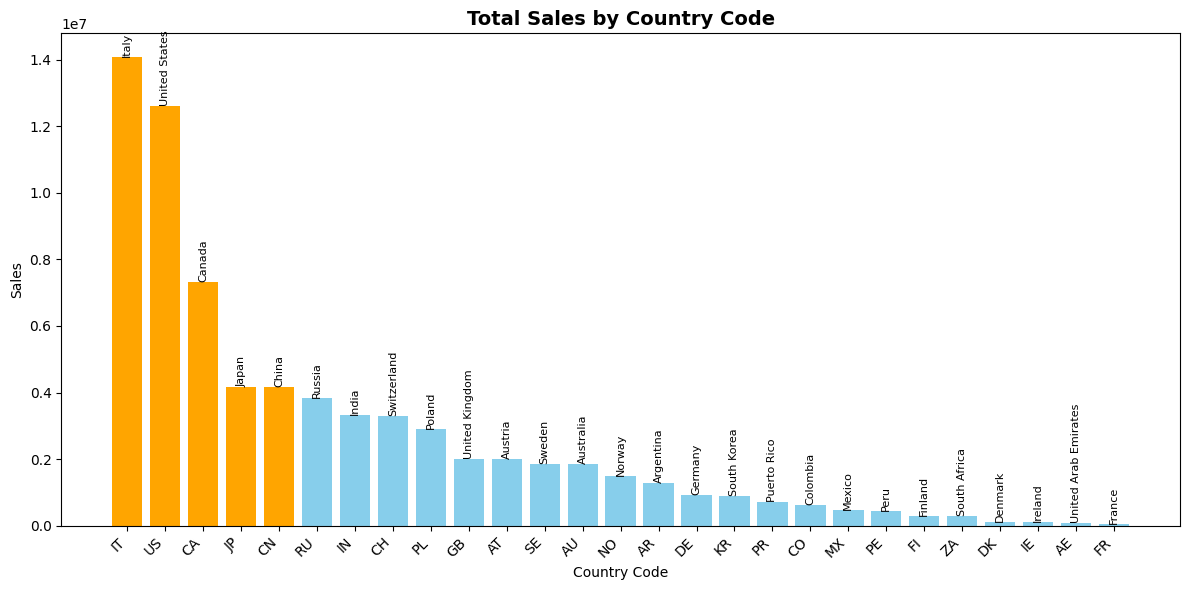

In [13]:
colors = ["orange" if i < 5 else "skyblue" for i in range(len(df_sorted))]

# Plot with short labels
plt.figure(figsize=(12,6))
bars = plt.bar(df_sorted["country"], df_sorted["sales"], color=colors)
plt.title("Total Sales by Country Code", fontsize=14, weight='bold')
plt.xlabel("Country Code")
plt.ylabel("Sales")
plt.xticks(rotation=45, ha="right")

# Add full country name above each bar
for bar, name in zip(bars, df_sorted["CountryName"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, name,
             ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()



## Conclusion

After cleaning the dataset and mapping country codes to their full names, I analyzed the total sales distribution across different countries using a bar chart.

From the visualization, it is clear that **Italy and the United States are the top-performing markets**, contributing the highest total sales figures. Italy leads with approximately **14.1 million**, followed closely by the United States with **12.6 million**. This indicates that these regions represent the most active customer bases in the dataset, and prioritizing marketing efforts or platform optimization in these countries may yield stronger engagement and revenue growth.